# Maier dataset

In [64]:
from model.graph_mcmc import Graph_MCMC

In [65]:
graph = Graph_MCMC()
graph.read_from_ns("law_firm")
graph.remove_property("_pos")
graph.remove_property("name")
graph.remove_property("nodeAge")
graph.convert_props_to_flags()

Vertex props: ['awkward connections', 'barcelona', 'choir', 'climbing', 'dortmund', 'erasmus', 'exgf', 'family', 'family friend', 'french class', 'friend of exgf', 'friend of friend', 'gf', 'hong kong', 'hongkong', 'mentoring', 'munich', 'physics conference', 'quitte', 'random', 'reddit', 'school', 'studienstiftung', 'uni', 'xrays', 'acquaintance', 'friend', 'grad school', 'rap', 'sailing', 'supervisor', 'zapf']


In [66]:
graph.print_info()

Graph with N=366 nodes, E=3442 edges and D=32 vertex features


In [67]:
graph.partition(B_min=5, B_max=5)

Performing inference...
Current bracket: (5, 5, 5) (7345.859971524306, 7345.859971524306, 7345.859971524306)
Current bracket: (5, 5, 5) (7345.859971524306, 7345.859971524306, 7345.859971524306)
Bisect at B = 5 with S = 7345.859971524306
Best result: B = 5, S = 7345.859971524306
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f2171cb6550, at 0x7f216cdcf520>

In [68]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 1369.66it/s]


5

Drawing soft partition


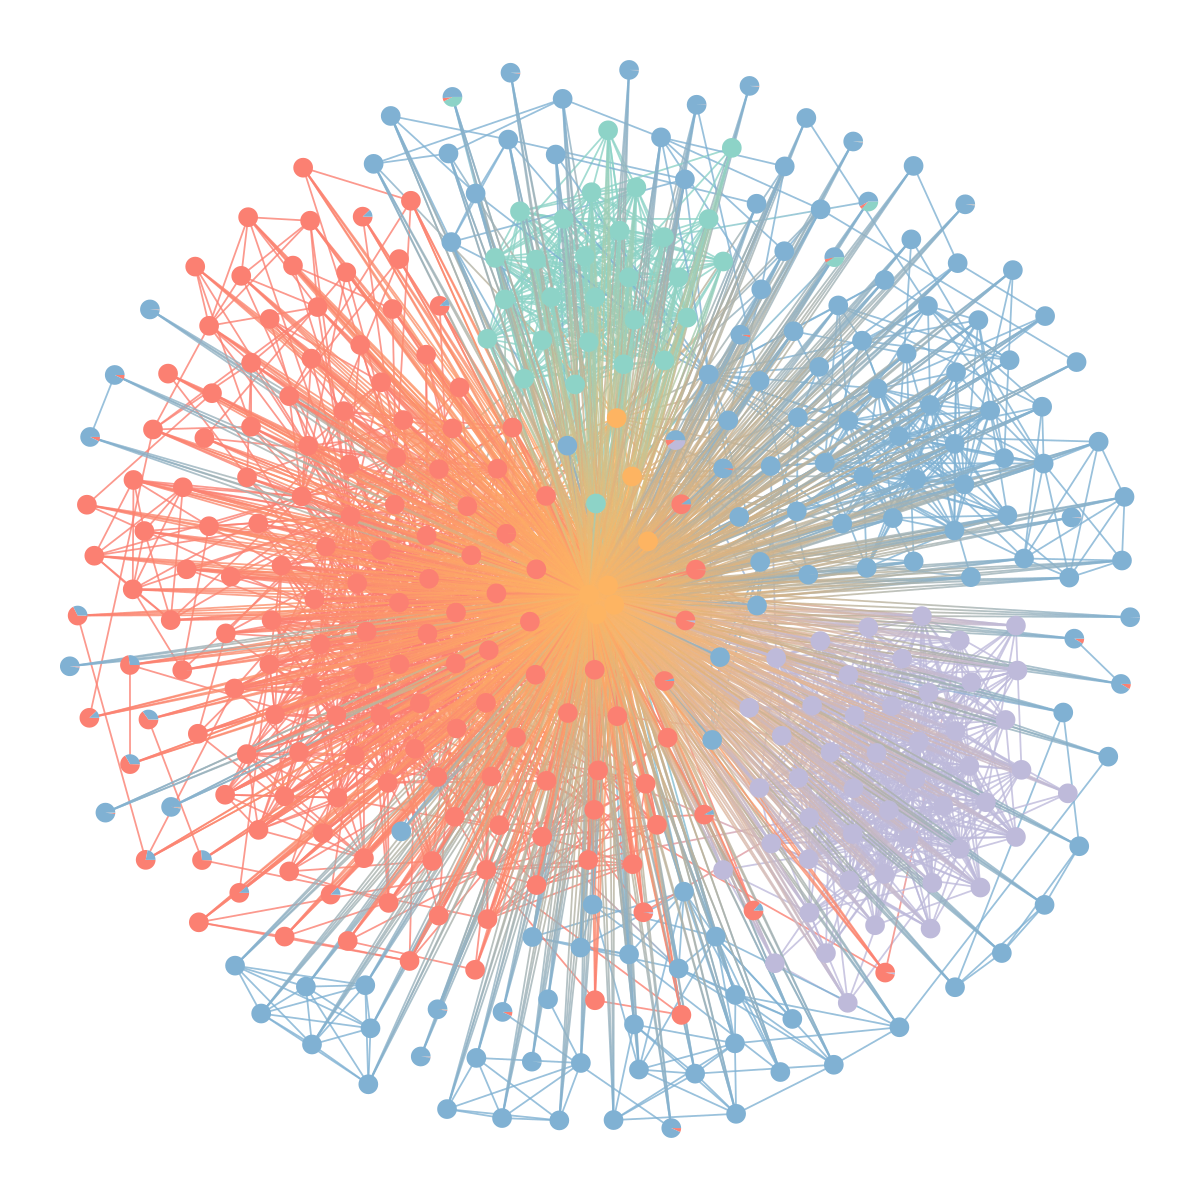

In [69]:
graph.draw()

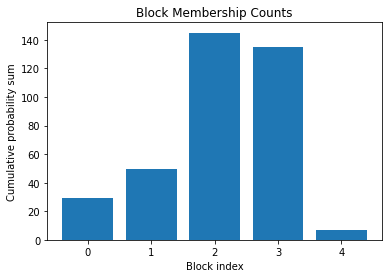

In [70]:
graph.plot_posterior_props()

## Train classifier

In [71]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:12<00:00, 831.12it/s]Sample accept ratio: 88.61%
Train. set accuracy: 75.40983606557377%



## Interpret results

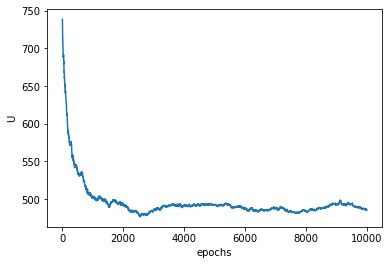

In [72]:
classifier.plot_U()

In [73]:
classifier.thin_samples()

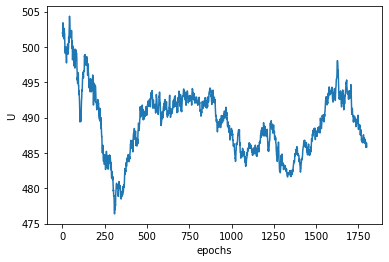

In [74]:
classifier.plot_U()

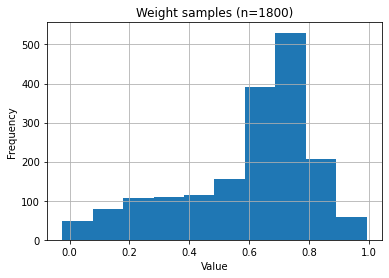

In [75]:
classifier.plot_sample_histogram()

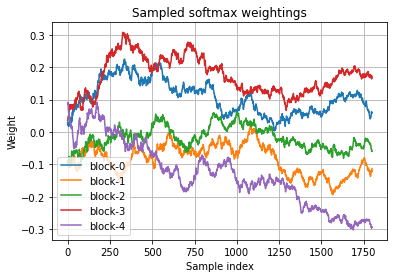

In [76]:
classifier.plot_sample_history()

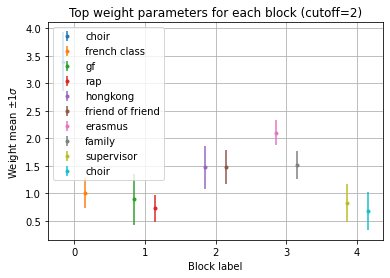

In [77]:
names = graph.get_feature_names()
classifier.plot_block_principal_dims(names, cutoff=2)

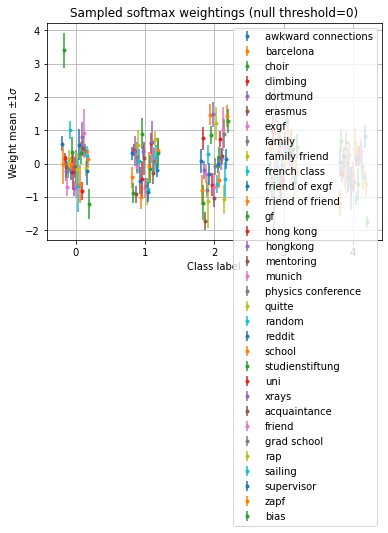

In [78]:
names = graph.get_feature_names()
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0)